In [4]:
import numpy as np
import scipy
from scipy.interpolate import BSpline
from scipy.interpolate import _bspl

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [5]:
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

In [6]:
import plotter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# import sys
# import os
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
# from ..code import plotter

In [8]:
colors = ['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255']*3

In [9]:
# get knot vectors
def get_kvs(rmin, rmax, nbins, order):
    nknots = order+2
    kvs = np.empty((nbins, nknots))

    width = (rmax-rmin)/(nbins-order)
    for i in range(order):
        val = i+1
        kvs[i,:] = np.concatenate((np.full(nknots-val, rmin), np.linspace(rmin+width, rmin+width*val, val)))
        kvs[nbins-i-1] = np.concatenate((np.linspace(rmax-width*val, rmax-width, val), np.full(nknots-val, rmax)))
    for j in range(nbins-2*order):
        idx = j+order
        kvs[idx] = rmin+width*j + np.arange(0,nknots)*width                     
    return kvs

def get_bases(rmin, rmax, nbins, order, ncont=300):
    if nbins<order*2:
        # does it have to be 2*order + 1? seems fine for piecewise, but for higher orders?
        raise ValueError("nbins must be at least twice the order")
    kvs = get_kvs(rmin, rmax, nbins, order)
    rcont = np.linspace(rmin, rmax, ncont)
    bases = np.empty((nbins, ncont))
    for n in range(nbins):
        kv = kvs[n]
        b = BSpline.basis_element(kv)
        bases[n,:] = [b(r) if kv[0]<=r<=kv[-1] else 0 for r in rcont]
    return bases

In [10]:
rmin = 0
rmax = 70
nbins = 7
ncont = 300
rcont = np.linspace(rmin, rmax, ncont)

Text(0, 0.5, 'pair counts')

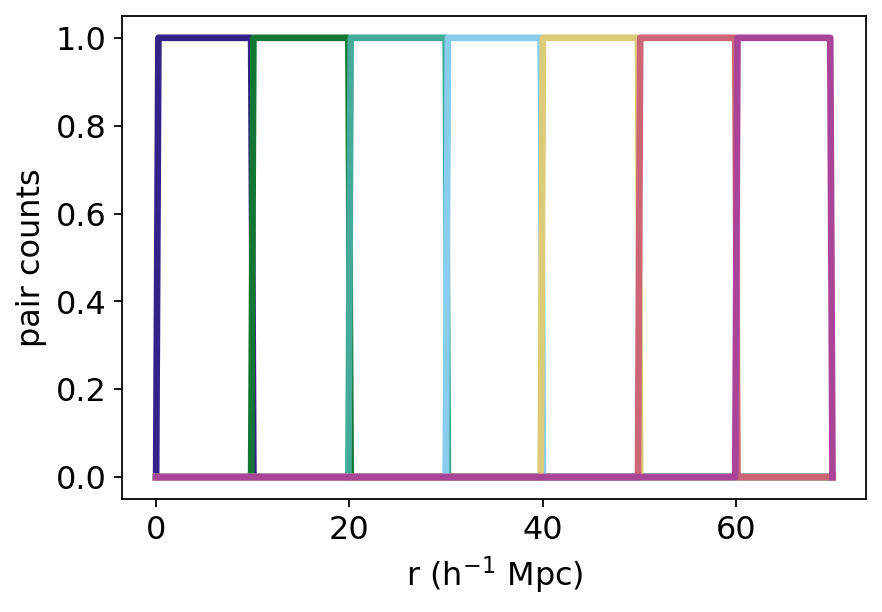

In [11]:
order = 0
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    if n==0:
        bases[n][0] = 0
    if n==nbins-1:
        bases[n][-1] = 0
    plt.plot(rcont, bases[n], color=colors[n], lw=3)
plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'pair counts')

Text(0, 0.5, 'pair counts')

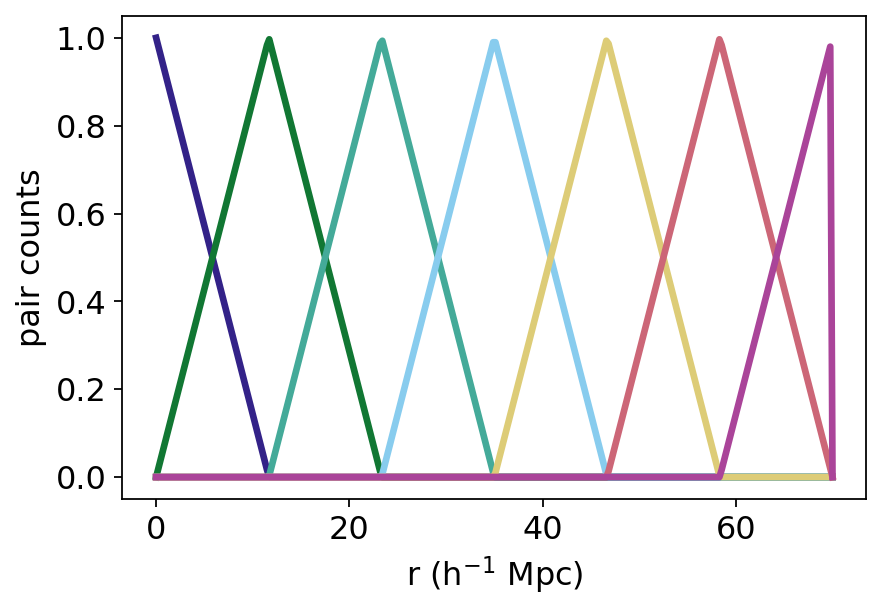

In [12]:
order = 1
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n], color=colors[n], lw=3)
plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'pair counts')

Text(0, 0.5, 'pair counts')

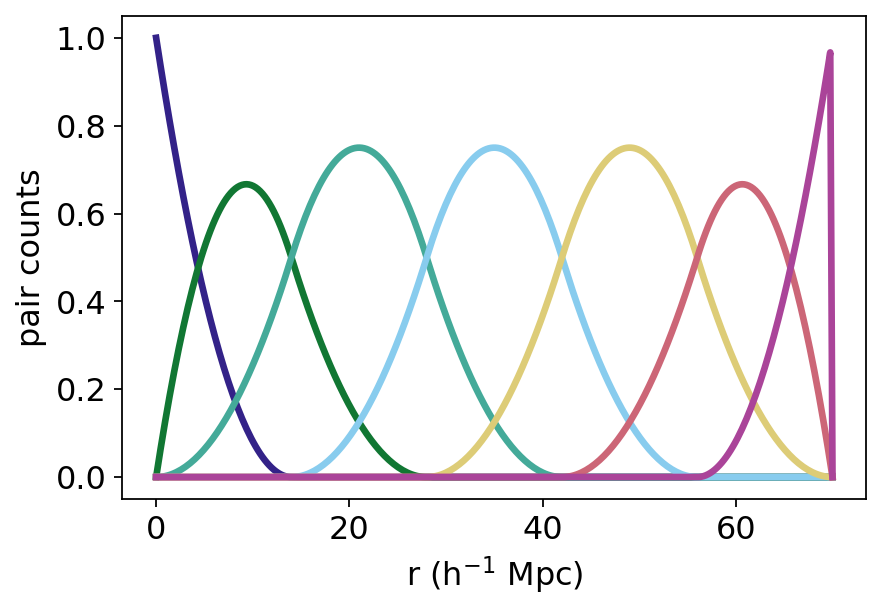

In [13]:
order = 2
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n], color=colors[n], lw=3)
plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'pair counts')

Text(0, 0.5, 'pair counts')

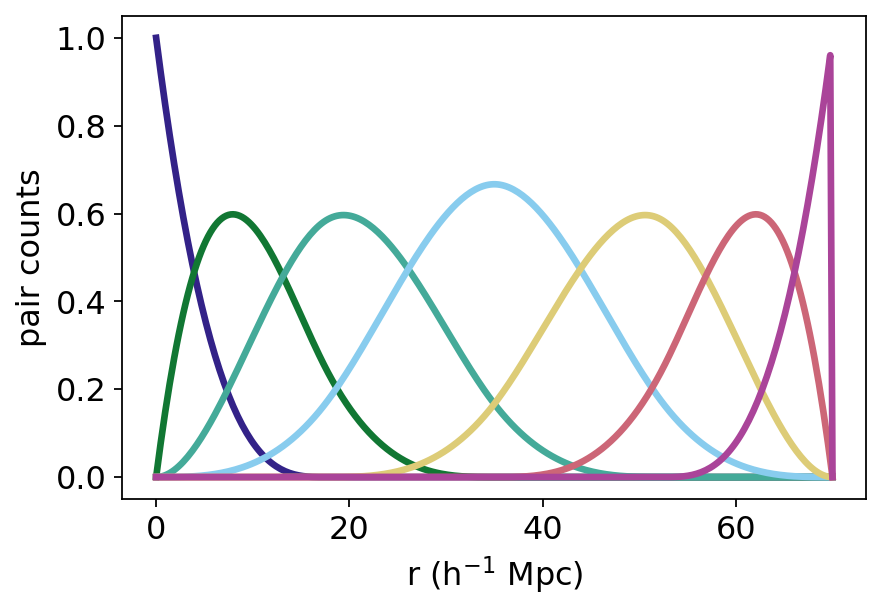

In [17]:
order = 3
bases = get_bases(rmin, rmax, nbins, order)
for n in range(nbins):
    plt.plot(rcont, bases[n], color=colors[n], lw=3)
plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'pair counts')

In [27]:
plot_dir = '../plots/plots_2019-10-03'
result_dir = '../results/results_2019-10-03'
cat_dir = '../catalogs/catalogs_2019-09-30'
label_dict = {'generalr': 'cosmo deriv', 'tophat': 'tophat', 'piecewise':'triangle', 'linear_spline':'linear spline', 'quadratic_spline': 'quadratic spline', 'quadratic_spline_nbins8':'quadratic spline (8 bins)'}
color_dict = {'tophat':'blue', 'standard': 'orange', 'piecewise':'crimson', 'linear_spline':'red', 'cosmo deriv':'purple', 'triangle':'crimson', 'quadratic_spline':'green', 'quadratic_spline_nbins8':'limegreen'}

In [28]:
def plot_lognormal(tag, proj_types, plot_tag=None, log=False):
    r_stan_lin, xi_stan_lin, label_stan = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, 'standard', tag), allow_pickle=True, encoding='latin1')
    rs_lin = [r_stan_lin]
    cfs_lin = [xi_stan_lin]
    if log:
        r_stan_log, xi_stan_log, label_stan = np.load('{}/cf_log_{}{}.npy'.format(result_dir, 'standard', tag), allow_pickle=True, encoding='latin1')
        rs_log = [r_stan_log]
        cfs_log = [xi_stan_log]

    for proj_type in proj_types:

        r_lin, xi_proj_lin, projt = np.load('{}/cf_lin_{}{}.npy'.format(result_dir, proj_type, tag), allow_pickle=True, encoding='latin1')
        rs_lin.append(r_lin)
        cfs_lin.append(xi_proj_lin)
        if log:
            r_log, xi_proj_log, projt = np.load('{}/cf_log_{}{}.npy'.format(result_dir, proj_type, tag), allow_pickle=True, encoding='latin1')
            rs_log.append(r_log)
            cfs_log.append(xi_proj_log)

    colors = [color_dict['standard']] + [color_dict[pt] for pt in proj_types]
    labels = ['standard'] + [label_dict[pt] for pt in proj_types]

    r_true_lin, xi_true_lin, label_true = np.load('{}/cf_lin_{}{}.npy'.format(cat_dir, 'true', cat_tag), allow_pickle=True, encoding='latin1')
    if plot_tag:
        save_lin = '{}/cf_lin{}{}.png'.format(plot_dir, tag, plot_tag)
    else:
        save_lin = None
    plotter.plot_cf_cont(rs_lin, cfs_lin, r_true_lin, xi_true_lin, labels, colors, saveto=save_lin, log=False, err=True)

    if log:
        r_true_log, xi_true_log, label_true = np.load('{}/cf_log_{}{}.npy'.format(cat_dir, 'true', cat_tag), allow_pickle=True, encoding='latin1')
        save_log = '{}/cf_log{}{}.png'.format(plot_dir, tag, plot_tag)
        plotter.plot_cf_cont(rs_log, cfs_log, r_true_log, xi_true_log, labels, colors, saveto=save_log, log=True, err=True)


In [29]:
boxsize = 750
nbar_str = '3e-4'
cat_tag = '_L{}_nbar{}'.format(boxsize, nbar_str)

plotting


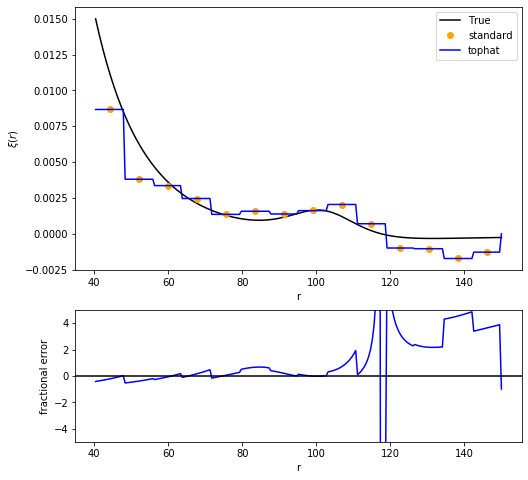

In [30]:
tag = cat_tag+''
proj_types = ['tophat']
plot_lognormal(tag, proj_types)

plotting


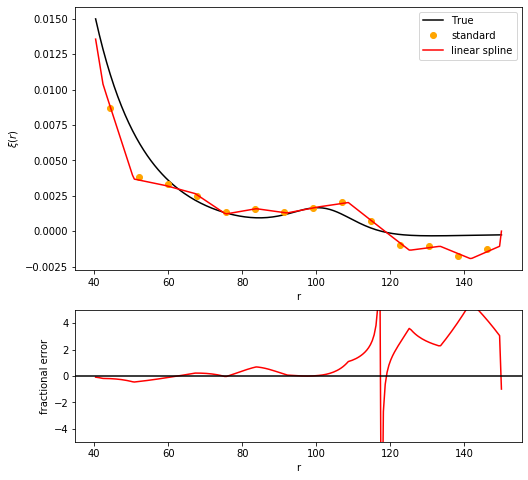

In [31]:
tag = cat_tag+''
proj_types = ['linear_spline']
plot_lognormal(tag, proj_types)

plotting


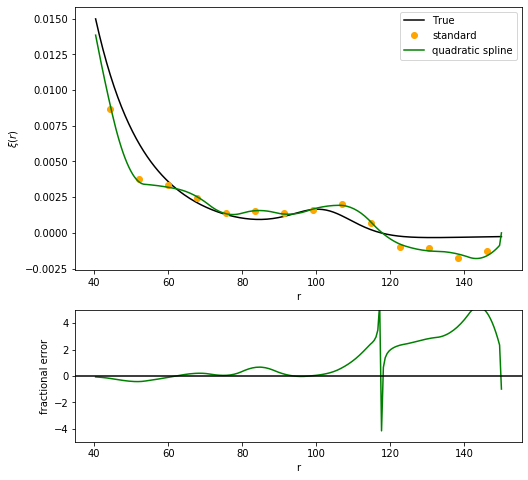

In [32]:
tag = cat_tag+''
proj_types = ['quadratic_spline']
plot_lognormal(tag, proj_types)

plotting


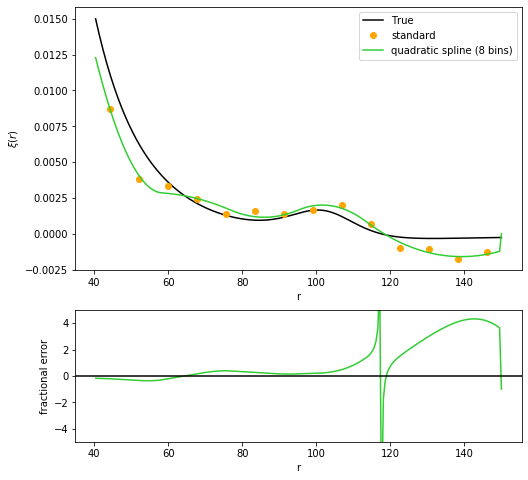

In [33]:
tag = cat_tag+''
proj_types = ['quadratic_spline_nbins8']
plot_lognormal(tag, proj_types)

plotting


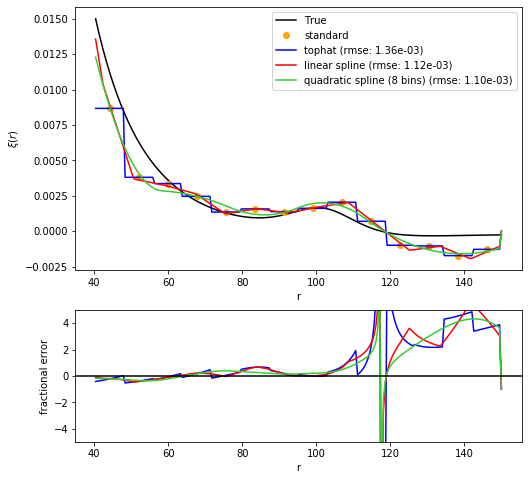

In [42]:
tag = cat_tag+''
proj_types = ['tophat', 'linear_spline', 'quadratic_spline_nbins8']
plot_lognormal(tag, proj_types)a

In [57]:
def circle(x, r):
    return np.sqrt(r**2 - x**2)

In [86]:
def rand_between(mymin, mymax, n=1):
    return np.random.rand(n)*(mymax-mymin) + mymin

[10. 20. 30. 40. 50. 60. 70.]


/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Text(0, 0.5, 'r (h$^{-1}$ Mpc)')

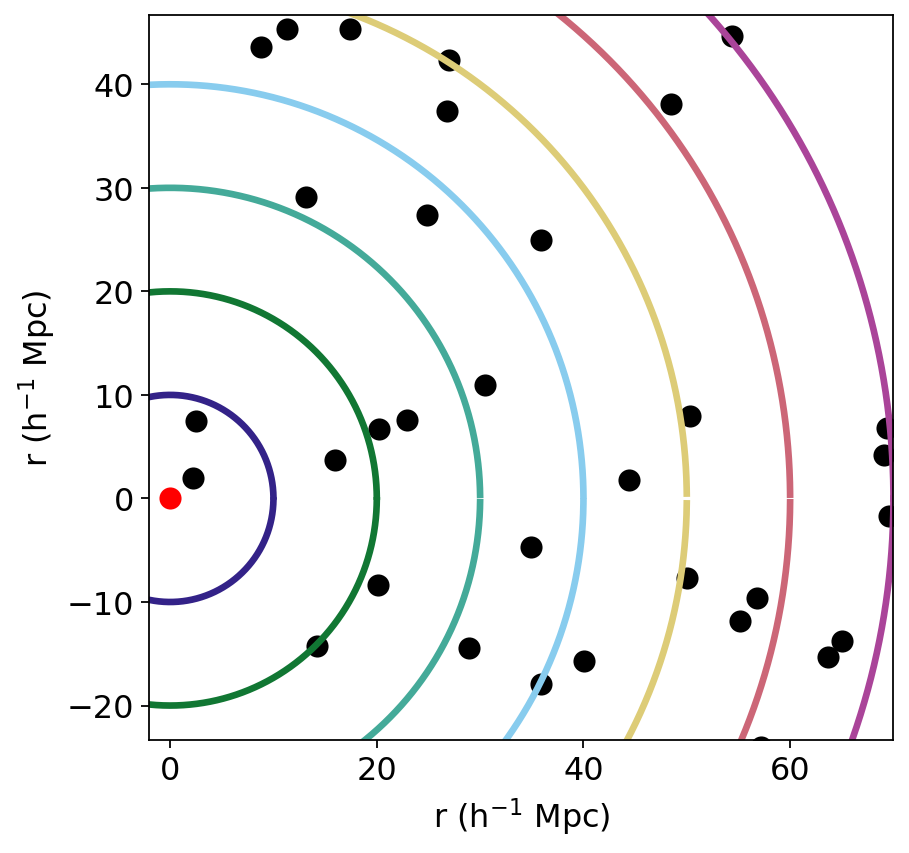

In [163]:
plt.figure(figsize=(6,6))
plt.axis('equal')
x = np.linspace(rmin-2, rmax, 30000)
rs = np.linspace(rmin, rmax, nbins+1)[1:]
print(rs)
for i in range(len(rs)):
    circ = circle(x, rs[i])
    #print(circ)
    #print(circ)
    #print(np.isnan(circ))
    #circ = circ[(np.isnan(circ) is False)]
    #print(circ)
    #np.append(x, rs[i])
    #np.append(x, 0)
    plt.plot(np.concatenate((x, [rs[i]])), np.concatenate((circ, [0])), color=colors[i], lw=3)
    plt.plot(x, -circ, color=colors[i], lw=3)
    #plt.plot(rs[i], 0, color=colors[i])
    
marker = 'o'
col = 'k'
size = 80
n = 60
plt.scatter(0, 0, marker=marker, color='red', s=size)
xscat = rand_between(rmin, rmax, n)
yscat = rand_between(-rmax, rmax, n)

plt.scatter(xscat, yscat, marker=marker, color=col, s=size)
plt.xlim(min(x), rmax)
plt.ylim(-1/3*rmax, 2/3*rmax)

plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'r (h$^{-1}$ Mpc)')

[10. 20. 30. 40. 50. 60. 70.]


/Users/ksf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(-72.0, 72.0, -72.0, 72.0)

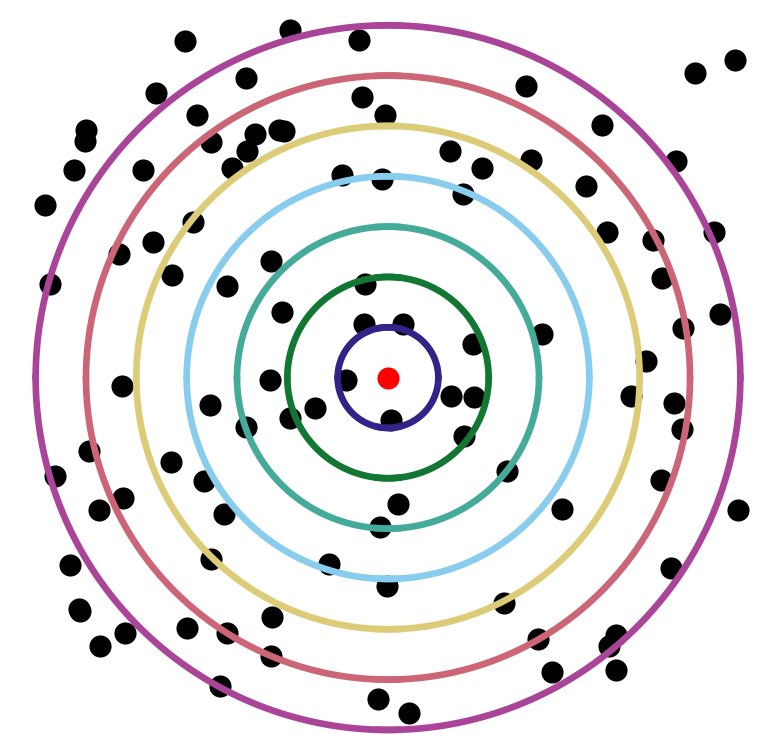

In [180]:
plt.figure(figsize=(6,6))
plt.axis('equal')
x = np.linspace(rmin-2, rmax, 30000)
rs = np.linspace(rmin, rmax, nbins+1)[1:]
print(rs)
for i in range(len(rs)):
    circ = circle(x, rs[i])
    plt.plot(np.concatenate((x, [rs[i]])), np.concatenate((circ, [0])), color=colors[i], lw=3)
    plt.plot(np.concatenate((-x, [-rs[i]])), np.concatenate((circ, [0])), color=colors[i], lw=3)
    plt.plot(x, -circ, color=colors[i], lw=3)
    plt.plot(-x, -circ, color=colors[i], lw=3)

    
marker = 'o'
col = 'k'
size = 80
n = 50
plt.scatter(0, 0, marker=marker, color='red', s=size)
xscat = rand_between(-rmax, rmax, n*2)
yscat = rand_between(-rmax, rmax, n*2)

plt.scatter(xscat, yscat, marker=marker, color=col, s=size)
buf = 2
plt.xlim(-rmax-buf, rmax+buf)
plt.ylim(-rmax-buf, rmax+buf)

plt.xlabel(r'r (h$^{-1}$ Mpc)')
plt.ylabel(r'r (h$^{-1}$ Mpc)')
plt.axis('off')